# Assignment 2: EE708
## Dhruv Gupta, 240354

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category='FutureWarning')
plt.style.use("ggplot")

#using sklearn for the linear regression part.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Problem 8
Assume a linear model and add 0-mean Gaussian noise to generate 100 samples.\
a. Divide your sample into training and testing sets (80:20).\
b. Use linear regression for the training half. Compute the mean squared error (MSE) on the
testing set.\
c. Plot the fitted model along with the data.\
d. Repeat the same for polynomials of degrees 2 and 3 as well

**Part a:**  divided the data into training and testing sets and got the line that is supposed to come at the end of the exercise

In [422]:
np.random.seed(37)

#generating 100 samples randomly from the range of x=0 to 15
x = np.linspace(0,15,100)

#linear model with weight/slope = 3 and bias/intercept = 0.5
m, c = 3, 0.5

#gaussian noise with 0 mean and standard deviation of 3
epsilon = np.random.normal(loc=0, scale=3, size=100)
y = m*x + c + epsilon

x_train, y_train = x[0:80], y[0:80]
x_test, y_test = x[80:100], y[80:100]

**Part b:** performing linear regression on the training set and calculating MSE on the test data

In [423]:
#feature matrix for X has to be stored in a dataframe matrix type object
X_train_L = np.array([x_train]) # this wont work because it gives (1,80) size not (80,1)
X_train = x_train.reshape(-1,1) # this converts to (80,1) object, which is our matrix X
model = LinearRegression()
model.fit(X_train, y_train)
print("Slope of the line predicted: ", model.coef_[0])
print("Intercept of the line predicted: ", model.intercept_)

Slope of the line predicted:  2.899878458838564
Intercept of the line predicted:  1.2716257247466096


In [424]:
y_train_pred = model.predict(X_train)
X_test = x_test.reshape(-1,1)
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on the testing set is: {mse}")

Mean Squared Error on the testing set is: 8.228128879606325


**Part c:** plotting the fitted model along with the data

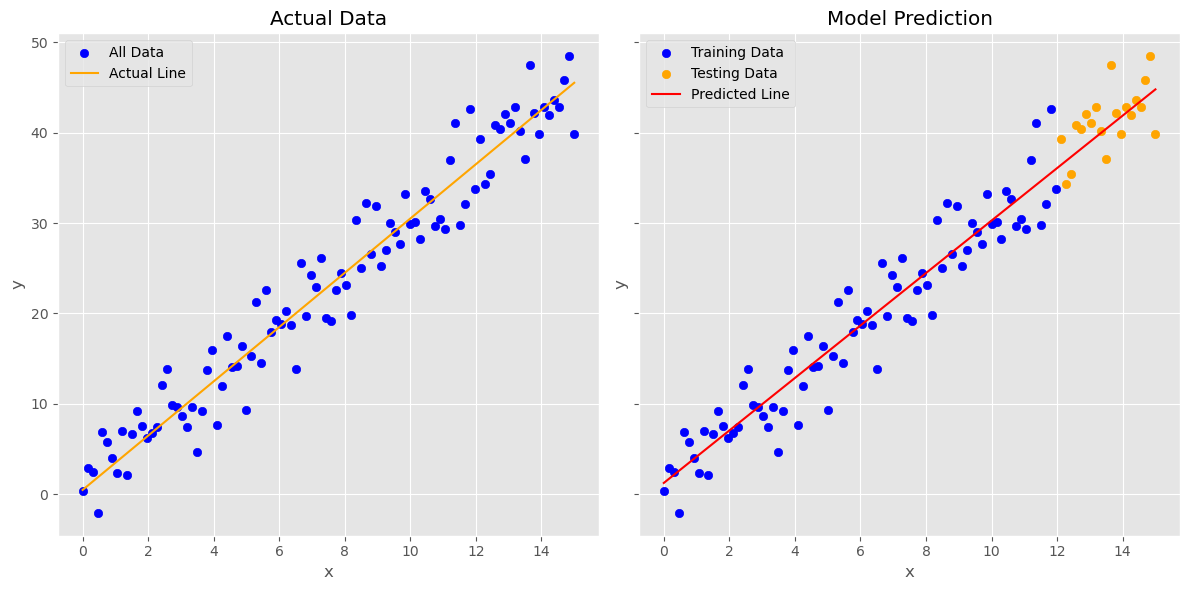

In [425]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.scatter(x,y,color='blue',label='All Data')
ax1.plot(x, m*x+c, color='orange',label='Actual Line')
ax1.legend()
ax1.set_xlabel("x"); ax1.set_ylabel("y")
ax1.set_title("Actual Data")
ax2.scatter(x_train,y_train,color='blue',label='Training Data')
ax2.scatter(x_test, y_test, color='orange', label='Testing Data')
ax2.plot(x, (model.coef_[0])*x + (model.intercept_), color='red',label='Predicted Line')
ax2.legend()
ax2.set_xlabel("x"); ax2.set_ylabel("y")
ax2.set_title("Model Prediction")
plt.tight_layout()
plt.show()

**Part d:** repeating the same thing for polynomials of degrees 2 and 3 as well\


**degree 2 polynomial fitting**\
(y = a + bx + cx^2, here I'm assuming a= -1.5, b= 1.7, c= -0.1 for ideal curve)

In [426]:
np.random.seed(21)

x1 = np.linspace(0,15,100)
x2 = x1**2   # x2 is effectively an independent feature, so we will perform multiple regression with x1, x2 as features.
epsilon = np.random.normal(loc=0,scale=0.6,size=100) #gaussian noise with mean 0 and std 0.6

a= -1.5; b= 1.7; c= -0.1
y = (a) + (b)*(x1) + (c)*(x2) + epsilon

In [427]:
#to convert 1D arrays to 2D arrays with one column
x1 = x1.reshape(-1,1); x2 = x2.reshape(-1,1)

#now make final feature matrix by stacking these columns horizontally
X = np.hstack((x1,x2))

#training and testing splits
x_train = X[0:80]; x_test = X[80:100]
y_train = y[0:80]; y_test = y[80:100]

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficients predicted corresponding to a, b and c are:")
print(f"a = {model.intercept_.round(3)}, b = {model.coef_[0].round(3)}, c = {model.coef_[1].round(3)}")

#mean squared error calculation
y_train_pred = (model.intercept_) + (model.coef_[0])*(x1) + (model.coef_[1])*(x2)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error of the model for testing data is: {mse}")

Coefficients predicted corresponding to a, b and c are:
a = -1.509, b = 1.677, c = -0.095
Mean Squared Error of the model for testing data is: 1417.882487932521


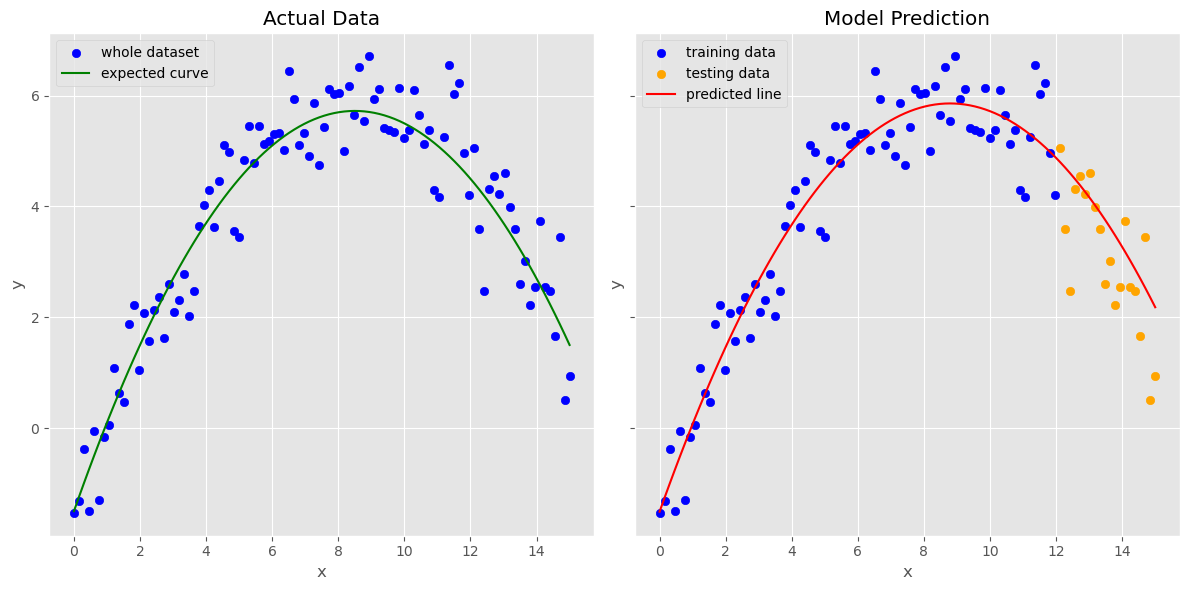

In [428]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.scatter(x1, y, color='blue', label='whole dataset')
ax1.plot(x1, y-epsilon, color = 'green', label='expected curve')
ax1.set_xlabel("x"); ax1.set_ylabel("y")
ax1.set_title("Actual Data") 
ax1.legend()
ax2.scatter(x1[0:80], y_train, color = 'blue', label='training data')
ax2.scatter(x1[80:100], y_test,color='orange', label='testing data')
ax2.plot(x1, y_train_pred, color='red', label='predicted line')
ax2.set_xlabel("x"); ax2.set_ylabel("y")
ax2.set_title("Model Prediction")
ax2.legend()
plt.tight_layout()
plt.show()

**degree 3 polynomial fitting**\
(y = a + bx + cx^2 + dx^3, here I'm assuming a= -9.8, b= 0.8, c= 1.1, d= -0.1 for ideal curve)

The coefficients predicted corresponding to a, b, c and d are:
a = -9.35, b = -1.347, c = 1.892, d = -0.171
Mean Squared Error for the model during testing is:  67.7496760314958


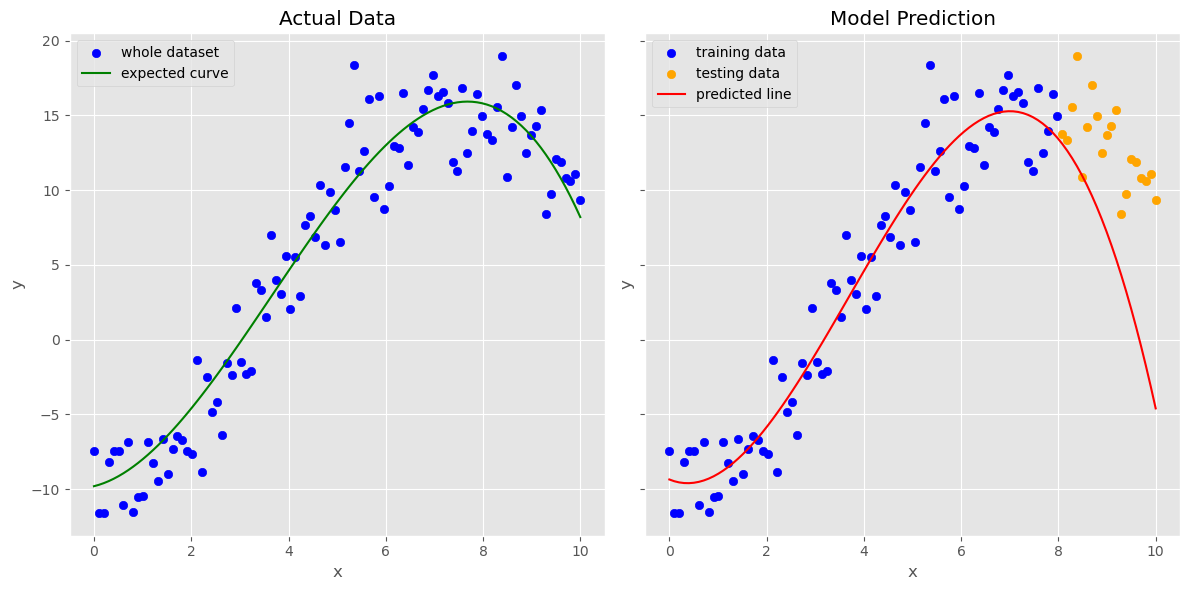

In [429]:
a= -9.8; b= 0.8; c= 1.1; d= -0.1

x1 = np.linspace(0,10,100)
x2 = x1**2
x3 = x1**3
epsilon = np.random.normal(loc=0, scale=2.5, size=100) #normal with mean 0 and std as 2.5 for the gaussian noise

y = a + b*x1 + c*x2 + d*x3 + epsilon

X = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)))
x_train = X[0:80]; x_test = X[80:100]
y_train = y[0:80]; y_test = y[80:100]

model = LinearRegression()
model.fit(x_train, y_train)

print("The coefficients predicted corresponding to a, b, c and d are:")
print(f"a = {model.intercept_.round(3)}, b = {model.coef_[0].round(3)}, c = {model.coef_[1].round(3)}, d = {model.coef_[2].round(3)}")

y_train_pred = (model.intercept_) + (model.coef_[0])*x1 + (model.coef_[1])*x2 + (model.coef_[2])*x3 
y_test_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error for the model during testing is: ", mse)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.scatter(x1, y, color='blue', label='whole dataset')
ax1.plot(x1, y-epsilon, color = 'green', label='expected curve')
ax1.set_xlabel("x"); ax1.set_ylabel("y")
ax1.set_title("Actual Data") 
ax1.legend()
ax2.scatter(x1[0:80], y_train, color = 'blue', label='training data')
ax2.scatter(x1[80:100], y_test,color='orange', label='testing data')
ax2.plot(x1, y_train_pred, color='red', label='predicted line')
ax2.set_xlabel("x"); ax2.set_ylabel("y")
ax2.set_title("Model Prediction")
ax2.legend()
plt.tight_layout()
plt.show()

# Problem 9
Implement logistic regression using dataset A2_P2.csv.\
Write a code for gradient descent with
learning rates of 0.01 and 0.05. For each learning rate:\
a. Plot variation of mean squared error for 20 iterations.\
b. Specify the final weight value.

In [430]:
df = pd.read_csv('A2_P2.csv')
df.set_index('Samples')
print(df.shape)
print(df.isnull().sum())

(200, 4)
Samples      0
Feature 1    0
Feature 2    0
Output       0
dtype: int64


Theres clearly no missing values or null values in the dataset, so we can proceed with splitting the data into training and testing sets, I have used 80% of the data as training data and the remaining 20% as testing data.\
**HOWEVER:** the features are clearly very different, and we need to normalise the values of feature 2 for our model to yield good results, since feature 1 has very small values and feature 2 has large values. I used min=max normalisation to normalise the features of each column.

In [431]:
# minmax normalisation for each feature to give better results
maxf1 = df['Feature 1'].max()
minf1 = df['Feature 1'].min()
df['Feature 1'] = (df['Feature 1'] - minf1) / (maxf1 - minf1)
maxf2 = df['Feature 2'].max()
minf2 = df['Feature 2'].min()
df['Feature 2'] = (df['Feature 2'] - minf2) / (maxf2 - minf2)

X = (df[['Feature 1', 'Feature 2']]).to_numpy()
y = df['Output'].to_numpy()

x_train = X[0:160]; x_test = X[160:200]
y_train = y[0:160]; y_test = y[160:200]

To implement logistic regression and gradient descent in this dataset, since there are only 200 values in the dataset, we can use **Batch Gradient Descent**, since BGD will give us better accuracy and won't be that hard to do since theres only 200 samples. I have implemented this below:

For learning rate of alpha = 0.01: 
Final values of weights (for 20th iteration) are: 
bias = 0.189, w1 = 0.509, w2 = 0.533


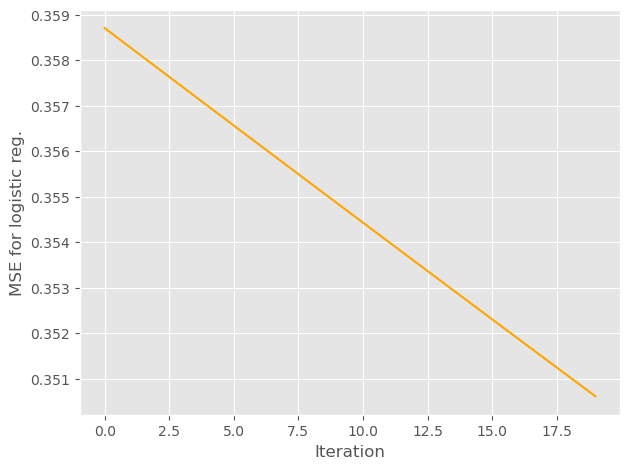

Accuracy of the model with alpha = 0.01 is: 20.0%

For learning rate of alpha = 0.05: 
Final values of weights (for 20th iteration) are: 
bias = 0.024, w1 = 0.439, w2 = 0.445


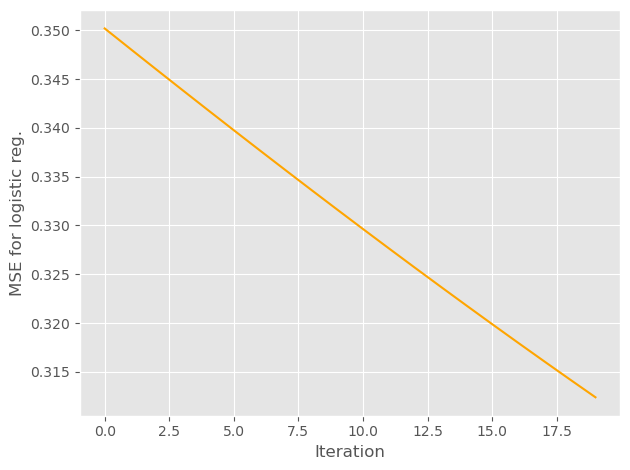

Accuracy of the model with alpha = 0.05 is: 20.0%


In [432]:
np.random.seed(16)
w = np.random.rand(3,)  # these are random initial weights, w for the weight vector, we will update this using gradient descent
b = w[0]; w1 = w[1]; w2 = w[2]  # b is bias term and w1,w2 are weights for two features

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
def der(sigmoi):
    return sigmoi*(1-sigmoi) #derivative of any sigmoid function
    
def bgd(alpha, b, w1, w2, n=20):
    msefn = []
    for iteration in range(1,n+1):
        db = 0
        dw1 = 0
        dw2 = 0
        costnum = 0
        for i in range(len(x_train)):
            x1 = x_train[i][0]
            x2 = x_train[i][1]
            z = b + w1 * x1 + w2 * x2
            logit = sigmoid(z)
            
            db += (logit - y_train[i]) * der(logit)        #partial derivative wrt b
            dw1 += (logit - y_train[i]) * der(logit) * x1  #partial derivative wrt w1
            dw2 += (logit - y_train[i]) * der(logit) * x2  #partial derivative wrt w2
            
            costnum += (logit - y_train[i])**2
        costfn = (costnum)/(len(x_train))
        msefn.append(costfn)
        
        #updating the weights for each iteration
        db *= (2/len(x_train)); dw1 *= (2/len(x_train)); dw2 *= (2/len(x_train))
        b -= alpha*db; w1 -= alpha*dw1; w2 -= alpha*dw2
    print("Final values of weights (for 20th iteration) are: ")
    print(f"bias = {b.round(3)}, w1 = {w1.round(3)}, w2 = {w2.round(3)}")
    indices = np.arange(0,n)
    
    plt.plot(indices, msefn, color='orange')
    plt.xlabel("Iteration"); plt.ylabel("MSE for logistic reg.")
    plt.tight_layout()
    plt.show()
    return b,w1,w2
    
print("For learning rate of alpha = 0.01: ")
b,w1,w2 = bgd(alpha = 0.01, w1=w1,w2=w2,b=b)
# using the logit function we got to predict the model's accuracy on the remaining data, ie the test set
correct_preds = 0
for i in range(len(x_test)):
    x1 = x_test[i][0]
    x2 = x_test[i][1]
    z = b + w1 * x1 + w2 * x2
    master_logit = sigmoid(z)
    if master_logit >= 0.5: #(using the logit function>=0.5 as a threshold for classification)
        predlabel = 1
        if predlabel == y_test[i]:
            correct_preds += 1
accuracy = (correct_preds/len(x_test))*100
print('Accuracy of the model with alpha = 0.01 is: ' + str(accuracy) + '%')

print()

print("For learning rate of alpha = 0.05: ")
b,w1,w2 = bgd(alpha = 0.05, w1=w1,w2=w2,b=b)
# using the logit function we got to predict the model's accuracy on the remaining data, ie the test set
correct_preds = 0
for i in range(len(x_test)):
    x1 = x_test[i][0]
    x2 = x_test[i][1]
    z = b + w1 * x1 + w2 * x2
    master_logit = sigmoid(z)
    if master_logit >= 0.5: #(using the logit function>=0.5 as a threshold for classification)
        predlabel = 1
        if predlabel == y_test[i]:
            correct_preds += 1
accuracy = (correct_preds*100/len(x_test))
print('Accuracy of the model with alpha = 0.05 is: ' + str(accuracy) + '%')


# Problem 10

Write a code to implement regression models using dataset A2_P3.csv. Divide the dataset into
training and testing sets (80:20). Implement the following models using the training dataset and
compute MSE on the test dataset:\
a. Linear regression.\
b. Linear regression with LASSO regularization $\left(\frac{{\lambda}}{2}  = 1\right)$\
c. Linear regression with ridge regularization $\left(\frac{{\lambda}}{2}  = 0.1\right)$\
Use bar plots to compare MSE and feature coefficients (weights) for the three methods.

In [433]:
dt = pd.read_csv('A2_P3.csv')
print(dt.shape)
print(dt.isnull().sum().any())

(100, 11)
False


Theres clearly no missing values or null values in the dataset, so we can proceed with splitting the data into training and testing sets, I have used 80% of the data as training data and the remaining 20% as testing data.\
The features are also (on observing the csv file), almost similar in terms of values, their min/max values dont seem to differ to much, so I won't be using normalisation in this case.

In [434]:
X = dt.drop('Target', axis=1).copy()
X = X.to_numpy()
y = dt['Target'].to_numpy()

x_train = X[0:80]; y_train = y[0:80]
x_test = X[80:100]; y_test = y[80:100]

**Part a:** linear regression (normal, unregularized)

In [435]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred_train = model.intercept_ + np.dot(x_train, model.coef_)
y_pred_test = model.predict(x_test)
feature_coeffs_unregularised = [model.intercept_]
feature_coeffs_unregularised += model.coef_.tolist()

mse_unregularised = mean_squared_error(y_pred_test, y_test)
print("MSE for unregularised linear regression is: ", mse_unregularised)

MSE for unregularised linear regression is:  3.0888005515078154


**Part b:** lasso regression  (with penalty parameter, $\frac{\lambda}{2} = \alpha = 1$)

In [436]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(x_train, y_train)

y_pred_train = model.intercept_ + np.dot(x_train, model.coef_)
y_pred_test = model.predict(x_test)
feature_coeffs_lasso = [model.intercept_]
feature_coeffs_lasso += model.coef_.tolist()

mse_lasso = mean_squared_error(y_pred_test, y_test)
print("MSE for lasso regression is: ", mse_lasso)

MSE for lasso regression is:  5.769614942209131


**Part c:** ridge regression  (with penalty parameter, $\frac{\lambda}{2} = \alpha = 0.1$)

In [437]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

y_pred_train = model.intercept_ + np.dot(x_train, model.coef_)
y_pred_test = model.predict(x_test)
feature_coeffs_ridge = [model.intercept_]
feature_coeffs_ridge += model.coef_.tolist()

mse_ridge = mean_squared_error(y_pred_test, y_test)
print("MSE for lasso regression is: ", mse_ridge)

MSE for lasso regression is:  3.077998520471078


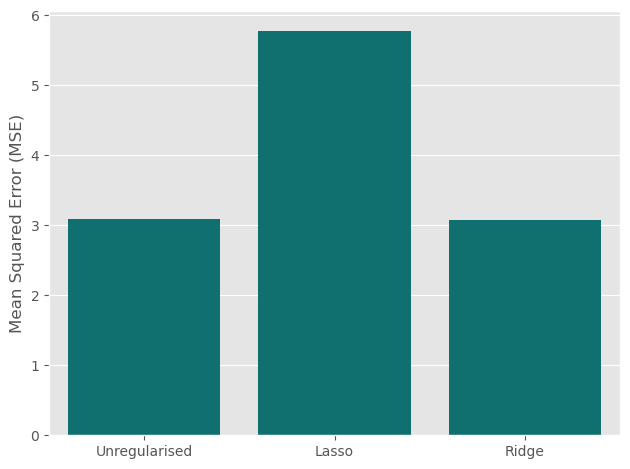

In [438]:
sns.barplot(y=[mse_unregularised, mse_lasso, mse_ridge],x=['Unregularised', 'Lasso','Ridge'], color='teal')
plt.ylabel("Mean Squared Error (MSE)")
plt.tight_layout(); plt.show()

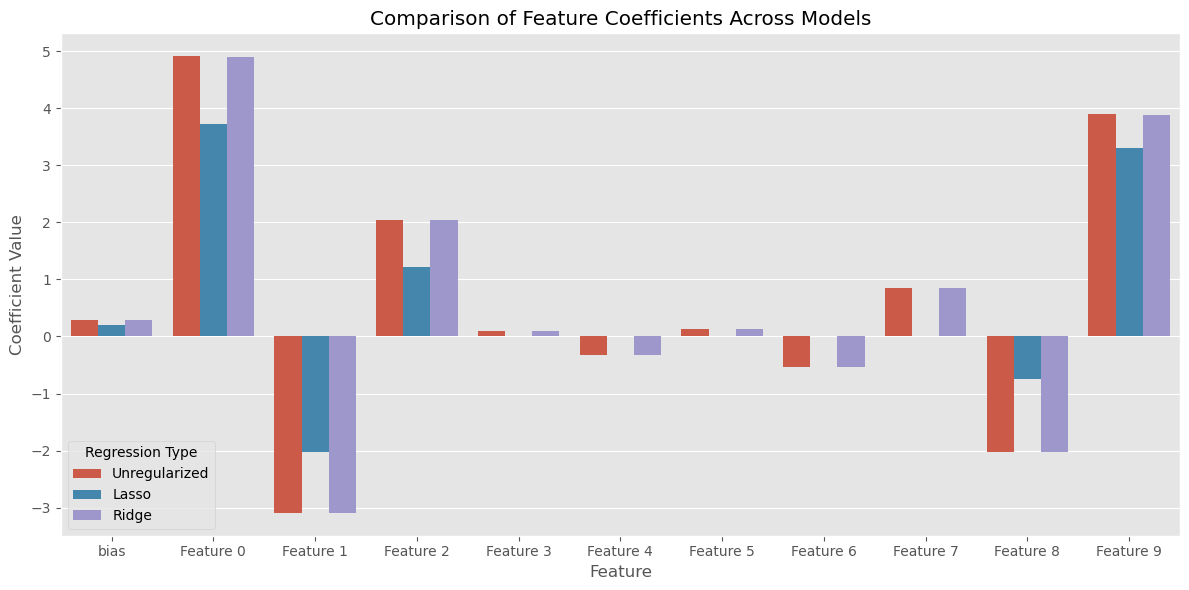

In [439]:
feature_names = ['bias']
feature_names.extend([f'Feature {i}' for i in range(10)])

dx = pd.DataFrame({
    'Feature': feature_names * 3,
    'Coefficient': np.concatenate([feature_coeffs_unregularised, 
                                   feature_coeffs_lasso, 
                                   feature_coeffs_ridge]),
    'Model': (['Unregularized'] * 11) + (['Lasso'] * 11) + (['Ridge'] * 11)
})

plt.figure(figsize=(12, 6))
sns.barplot(data=dx, x='Feature', y='Coefficient', hue='Model')

plt.ylabel("Coefficient Value")
plt.title("Comparison of Feature Coefficients Across Models")
plt.legend(title="Regression Type")
plt.tight_layout(); plt.show()
